Sentimental analisys

In [2]:
import os 
import re 
import nltk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Wczytanie pliku i funkcja 

In [3]:
path = r"data/review_polarity/txt_sentoken/neg/cv000_29416.txt"
def read_file(file_name):
    with open (file_name) as f:
        temp = f.read()
        f.close()
    return temp
    
read_file(path)
recenzja = read_file(path)

In [4]:
text=read_file(path)
slowa= text.split() #podzielenie tekstu na słowa wzgledem spacji jeżeli nic nie dam
slowa=set(slowa) #unikalne słowa


In [5]:
#zaladowanie calego fodleru negatywnego
path = r"data/review_polarity/txt_sentoken/neg/"
for filename in os.listdir(path):
    if filename.endswith(".txt"): #sprwdzam czy wszsyktie plikie koncza sie na .txt
        temp = read_file(path+'/'+filename) #wczytuje plik
        slowa.update(temp.split()) #dodaje do zbioru slowa z pliku

In [6]:
#zaladowanie calego fodleru pozytywnego
path_pos = r"data/review_polarity/txt_sentoken/pos/"
for filename in os.listdir(path_pos):
    if filename.endswith(".txt"): #sprwdzam czy wszsyktie plikie koncza sie na .txt
        temp = read_file(path_pos+'/'+filename) #wczytuje plik
        slowa.update(temp.split()) #dodaje do zbioru slowa z pliku

In [7]:
slownik = list(slowa) #zbiór słów zamainai set na slownik
slownik


['module',
 'wrapped-up',
 'interpret',
 'cowboy/hick',
 "anna's",
 'good-film-making',
 'ziembicki',
 'none-too-subtly',
 'difficult',
 'purchased',
 'tramell',
 'jonathan',
 'bea',
 'sturdy',
 'clerical',
 "rd's",
 "`goodfellas'",
 'vantages',
 'interpersonal',
 '110',
 'enjoyability',
 'fishermen',
 'self-hypnosis',
 'oblige',
 'mascara',
 "--it's",
 'likelihood',
 '97%',
 'bureaucracy',
 'apologies',
 'offenders',
 'garage',
 'close',
 'ryan-starrer',
 'largest',
 'tapioca',
 'nsync',
 'brothels',
 'pages',
 'powerhouses',
 'pointe',
 'ball-sniffing',
 "louise'",
 'wizened',
 'novella',
 'unheard-of',
 'tale',
 'brosnan',
 'advise',
 'thunderously',
 "change-i'll",
 'bio-pics',
 'macgowan',
 'muff',
 'waitress',
 'acerbity',
 'fact--but',
 'leapfrog',
 'puzzling',
 'simpson',
 'remembers--and',
 'honesty',
 "noah's",
 'notes',
 'invasive',
 'wily',
 'atlantis',
 'captain',
 'speeding',
 '2015',
 'dan',
 'dreads',
 'stodge',
 'result',
 'bizarrely',
 'roberts-whose',
 '1692',
 'prog

In [8]:
#pozbycie sie niepotrebynch slow znakow czyszczenie
sl= re.findall(r"\b\w+\b"," ".join(slownik)) #wyszukuje slowa zaczynajace sie od litery i konczace na litere tymczasowy slowniks
len(sl)

63078

In [9]:
#pozbycie sie stop słów
nltk.download('stopwords')
from nltk.corpus import stopwords

stop=stopwords.words('english')
len(stop)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msigm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [10]:
slownik2= [w for w in sl if w not in stop] #usuwam stop słowa
len(slownik2)

57068

In [11]:
slownik3= [w for w in slownik2 if len(w) > 1] #usuwam słowa jedno literowe
len(slownik3)

56741

In [ ]:
# # Inicjalizacja słownika, który będzie przechowywał liczbę wystąpień słów ze słownika `slownik3` w plikach
# my_dick = {}
# for s in slownik3:
#     my_dick[s] = 0  # Dla każdego słowa w `slownik3` ustawiamy początkową wartość na 0

# # Ścieżka do folderu z negatywnymi recenzjami
# path = r"data/review_polarity/txt_sentoken/neg/"

# # Iteracja po wszystkich plikach w folderze z negatywnymi recenzjami
# for filename in os.listdir(path): 
#     if filename.endswith(".txt"):  # Sprawdzamy, czy plik ma rozszerzenie .txt
#         temp = read_file(path + '/' + filename)  # Wczytujemy zawartość pliku za pomocą funkcji read_file
#         plik = temp.split()  # Dzielimy tekst pliku na listę słów
#         plik = set(plik)  # Zamieniamy listę na zbiór, aby usunąć duplikaty
#         plik = plik.intersection(slownik3)  # Znajdujemy słowa, które występują zarówno w pliku, jak i w `slownik3`
#         for d in plik:  # Dla każdego słowa, które występuje w obu zbiorach:
#             my_dick[d] += 1  # Zwiększamy licznik dla danego słowa w `my_dick`

# # Ścieżka do folderu z pozytywnymi recenzjami
# path = r"data/review_polarity/txt_sentoken/pos/"

# # Iteracja po wszystkich plikach w folderze z pozytywnymi recenzjami
# for filename in os.listdir(path): 
#     if filename.endswith(".txt"):  # Sprawdzamy, czy plik ma rozszerzenie .txt
#         temp = read_file(path + '/' + filename)  # Wczytujemy zawartość pliku za pomocą funkcji read_file
#         plik = temp.split()  # Dzielimy tekst pliku na listę słów
#         plik = set(plik)  # Zamieniamy listę na zbiór, aby usunąć duplikaty
#         plik = plik.intersection(slownik3)  # Znajdujemy słowa, które występują zarówno w pliku, jak i w `slownik3`
#         for d in plik:  # Dla każdego słowa, które występuje w obu zbiorach:
#             my_dick[d] += 1  # Zwiększamy licznik dla danego słowa w `my_dick`


In [12]:
#liczenei ile tych słów jest zaincjonowanych w plikach 0
my_dick= {}
for s in slownik3:
    my_dick[s]=0
    
path = r"data/review_polarity/txt_sentoken/neg/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        temp = read_file(path+'/'+filename)
        plik = temp.split()
        plik = set(plik)
        plik = plik.intersection(slownik3)
        for d in plik:
            my_dick[d]+=1 
            
            
path = r"data/review_polarity/txt_sentoken/pos/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        temp = read_file(path+'/'+filename)
        plik = temp.split()
        plik = set(plik)
        plik = plik.intersection(slownik3)
        for d in plik:
            my_dick[d]+=1 

In [13]:
my_dick

{'module': 2,
 'wrapped': 37,
 'interpret': 4,
 'cowboy': 29,
 'hick': 4,
 'anna': 24,
 'good': 1149,
 'film': 1723,
 'making': 462,
 'ziembicki': 1,
 'none': 208,
 'subtly': 8,
 'difficult': 175,
 'purchased': 3,
 'tramell': 1,
 'jonathan': 57,
 'bea': 1,
 'sturdy': 6,
 'clerical': 2,
 'rd': 6,
 'goodfellas': 14,
 'vantages': 1,
 'interpersonal': 1,
 '110': 3,
 'enjoyability': 2,
 'fishermen': 1,
 'self': 55,
 'hypnosis': 2,
 'oblige': 3,
 'mascara': 2,
 'likelihood': 6,
 '97': 2,
 'bureaucracy': 2,
 'apologies': 4,
 'offenders': 1,
 'garage': 12,
 'close': 198,
 'ryan': 84,
 'starrer': 0,
 'largest': 7,
 'tapioca': 1,
 'nsync': 1,
 'brothels': 1,
 'pages': 20,
 'powerhouses': 1,
 'pointe': 8,
 'ball': 48,
 'sniffing': 1,
 'louise': 5,
 'wizened': 3,
 'novella': 1,
 'unheard': 8,
 'tale': 182,
 'brosnan': 15,
 'advise': 3,
 'thunderously': 1,
 'change': 176,
 'bio': 2,
 'pics': 9,
 'macgowan': 1,
 'muff': 2,
 'waitress': 26,
 'acerbity': 1,
 'fact': 577,
 'leapfrog': 1,
 'puzzling': 9

In [14]:
slownik4=[w for w ,c in my_dick.items() if c > 2] # ograniczenie do słów które wystąpiły co naljniej 3 razy
len(slownik4)

17912

In [ ]:
# # Zakładamy, że `slownik4` to zbiór słów, które mają być użyte do tworzenia wektorów,
# # bez potrzeby wykonywania tokenizacji czy lematyzacji.

# # Inicjalizacja dwóch słowników: `word2index` i `index2word`
# word2index = {}  # Słownik mapujący każde słowo na unikalny indeks
# index2word = {}  # Słownik mapujący unikalny indeks na odpowiadające mu słowo

# # Iteracja po `slownik4` z użyciem funkcji `enumerate`, aby uzyskać indeksy i słowa
# for idw, w in enumerate(slownik4): 
#     word2index[w] = idw  # Przypisujemy słowu jego indeks w `word2index`
#     index2word[idw] = w  # Przypisujemy indeksowi odpowiadające słowo w `index2word`

# # Wyświetlenie słownika `word2index`
# # Każde słowo jest kluczem, a jego wartością jest indeks
# print(word2index)

# # Komentarz do kolejnych kroków:
# # 1. Na pozycjach odpowiadających indeksom ze słownika `word2index` w wektorze będziemy ustawiać wartość 1.
# # 2. Każdy wektor będzie reprezentacją danego dokumentu, opartą na obecności lub braku słów z `slownik4`.
# # 3. Jeśli słowo z `slownik4` występuje w dokumencie, ustawiamy wartość 1 na odpowiadającym indeksie w wektorze.


In [15]:
#zakaldamy że to koniec pracy ze słownikiem czyli nie wykonujemy teaminizacji i lteiminaizji

#tworzymy wetkory

word2index ={} 
index2word={}
for idw, w in enumerate (slownik4):
    word2index[w]= idw
    index2word[idw]=w
    
word2index
#na pozycjach wskazanych przez slwonik bedzemy stwaiac 1

{'wrapped': 0,
 'interpret': 1,
 'cowboy': 2,
 'hick': 3,
 'anna': 4,
 'good': 5,
 'film': 6,
 'making': 7,
 'none': 8,
 'subtly': 9,
 'difficult': 10,
 'purchased': 11,
 'jonathan': 12,
 'sturdy': 13,
 'rd': 14,
 'goodfellas': 15,
 '110': 16,
 'self': 17,
 'oblige': 18,
 'likelihood': 19,
 'apologies': 20,
 'garage': 21,
 'close': 22,
 'ryan': 23,
 'largest': 24,
 'pages': 25,
 'pointe': 26,
 'ball': 27,
 'louise': 28,
 'wizened': 29,
 'unheard': 30,
 'tale': 31,
 'brosnan': 32,
 'advise': 33,
 'change': 34,
 'pics': 35,
 'waitress': 36,
 'fact': 37,
 'puzzling': 38,
 'simpson': 39,
 'remembers': 40,
 'honesty': 41,
 'noah': 42,
 'notes': 43,
 'wily': 44,
 'atlantis': 45,
 'captain': 46,
 'speeding': 47,
 'dan': 48,
 'result': 49,
 'bizarrely': 50,
 'roberts': 51,
 'whose': 52,
 'programmer': 53,
 'friendly': 54,
 'explanation': 55,
 'expressed': 56,
 '1967': 57,
 'railroad': 58,
 'shoots': 59,
 'prisoner': 60,
 'seemingly': 61,
 'strange': 62,
 'two': 63,
 'century': 64,
 'regrets': 

In [16]:
#tworzenie inedksow zalezne ejst to od ilsci dokumentow przeciwczmy n jednym dokumencie tworzymy wektor
vec= np.zeros(len(slownik4))
for w in recenzja.split():
    if w in slownik4:
        vec[word2index[w]]=1
        
sum(vec)


239.0

In [17]:
#to teraz czas na cały korpus ile mamy plików 
ile=0
path = r"data/review_polarity/txt_sentoken/neg/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        ile+=1
            
            
path = r"data/review_polarity/txt_sentoken/pos/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        ile+=1
        
ile

2000

In [18]:
X= np.zeros((ile,len(slownik4)))
X.shape
Y= np.zeros(ile)
Y.shape



no=0
path = r"data/review_polarity/txt_sentoken/neg/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        temp= read_file(path+'/'+filename)
        plik= temp.split()
        plik=set(plik)
        pli= plik.intersection(slownik4)
        for w in plik:
            X[no, word2index[w] ] = 1
        no+=1   
            
path = r"data/review_polarity/txt_sentoken/pos/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        temp= read_file(path+'/'+filename)
        plik= temp.split()
        plik=set(plik)
        pli= plik.intersection(slownik4)
        for w in plik:
            X[no,word2index[w]]=1
        Y[no]=1
        no+=1  


KeyError: 'out'

In [19]:
import numpy as np

def clean_word(word):
    # Usuwanie znaków specjalnych i konwersja na małe litery
    return ''.join(char for char in word if char.isalnum()).lower()

X = np.zeros((ile, len(slownik4)))
Y = np.zeros(ile)

no = 0
path = r"data/review_polarity/txt_sentoken/neg/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        temp = read_file(path + '/' + filename)
        plik = temp.split()
        plik = {clean_word(word) for word in plik}  # Czyszczenie słów
        pli = plik.intersection(slownik4)  # Dopasowanie do słownika
        for w in pli:  # Iterujemy tylko po słowach ze słownika
            if w in word2index:  # Sprawdzamy, czy słowo jest w słowniku
                X[no, word2index[w]] = 1
        no += 1  

path = r"data/review_polarity/txt_sentoken/pos/" 
for filename in os.listdir(path): 
    if filename.endswith(".txt"): 
        temp = read_file(path + '/' + filename)
        plik = temp.split()
        plik = {clean_word(word) for word in plik}  # Czyszczenie słów
        pli = plik.intersection(slownik4)  # Dopasowanie do słownika
        for w in pli:  # Iterujemy tylko po słowach ze słownika
            if w in word2index:  # Sprawdzamy, czy słowo jest w słowniku
                X[no, word2index[w]] = 1
        Y[no] = 1  # Oznaczenie pozytywnej recenzji
        no += 1


In [20]:
X

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
Y

array([0., 0., 0., ..., 1., 1., 1.])

In [22]:
#w tym momencie mozemy przejść o tworzenia modelu dziłajaćego na X i Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)


In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
sum(Y_train)/len(Y_train),sum(Y_test)/len(Y_test)

(0.488125, 0.5475)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model= Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=X_train.shape[1]))
model.add(Dense(2, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam', metrics=['acc'])


C:\Users\msigm\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
history=model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.6871 - loss: 0.5912 - val_acc: 0.8875 - val_loss: 0.3677
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9918 - loss: 0.1636 - val_acc: 0.8850 - val_loss: 0.3072
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 1.0000 - loss: 0.0703 - val_acc: 0.8900 - val_loss: 0.2762
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 1.0000 - loss: 0.0345 - val_acc: 0.8975 - val_loss: 0.2641
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 1.0000 - loss: 0.0203 - val_acc: 0.8925 - val_loss: 0.2585
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 1.0000 - loss: 0.0134 - val_acc: 0.8925 - val_loss: 0.2572
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 1.0000 - loss: 0.0103 - val_acc: 0.8950 - val_loss: 0.2573
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 1.0000 - loss: 0.0073 - val_acc: 0.8975 - val_loss: 0.2581
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 1.0000

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │     1,791,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,374,508 (20.50 MB)

 Trainable params: 1,791,502 (6.83 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,583,006 (13.67 MB)

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

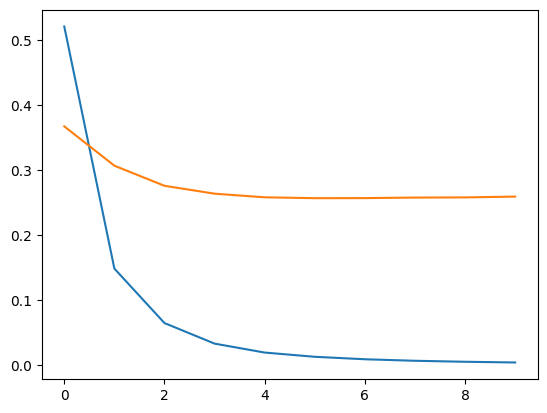

In [30]:
plt.plot(history.history['loss'] ,label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

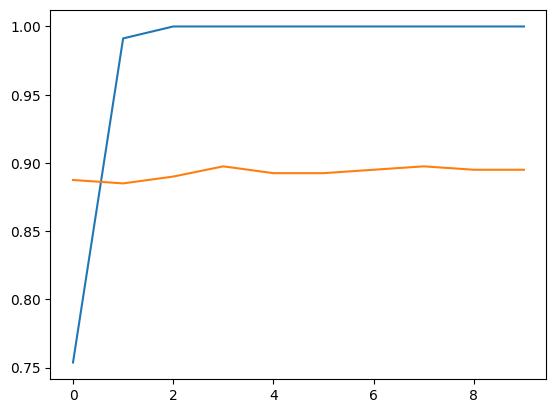

In [31]:
plt.plot(history.history['acc'] ,label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend